In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/602/DataForFinal/data1.csv')
n = 6
for i in range(2,n+1):
  data_path = '/content/drive/MyDrive/602/DataForFinal/data' + str(i) + '.csv'
  data_i = pd.read_csv(data_path)
  data = pd.concat([data,data_i],axis=0)
data.reset_index(drop=True,inplace=True)
data.rename(columns={'drive mode':'fuel consumption','fuel consumption':'drive mode'},inplace=True)
data

,new/used,name,milage,price,id,fuel consumption,drive mode,fuel type,accident history,clean title,one owner?,personal use,factory recall
0,Used,2016 Jaguar F-TYPE S,"25,279 mi.","$38,400",4f40a2dd-4080-4f32-84bf-c3bce4c0a7ca,19–27,Rear-wheel Drive,Gasoline,At least 1 accident or damage reported,NaN,No,No,NaN
1,NaN,NaN,NaN,NaN,8b1ef161-c7b0-4ae4-b5a6-8441b951d684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Used,2022 Nissan Pathfinder SL,"28,800 mi.","$32,994",1b6dae71-3160-4c99-8477-edda938c424f,21–27,Four-wheel Drive,Gasoline,At least 1 accident or damage reported,NaN,Yes,Yes,At least 1 open recall reported
3,Used,2021 Jeep Grand Cherokee SRT,"35,230 mi.","$62,500",fa45d263-0171-4222-808f-c2fdf658ff74,13–19,Four-wheel Drive,Gasoline,None reported,NaN,No,Yes,NaN
4,Used,2022 Cadillac CT4-V V-Series,"14,975 mi.","$44,995",3a98e7d4-71c0-4a88-87f1-576f4137d119,–,All-wheel Drive,Gasoline,None reported,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154783,Acura Certified,2023 Acura RDX A-Spec,"4,966 mi.","$43,370",79a45d1f-1fac-4f7a-a9f4-d9733382926d,22–27,Front-wheel Drive,Gasoline,None reported,NaN,No,No,NaN
154784,Used,2023 Land Rover Defender 75th Limited Edition,190 mi.,"$86,998",2096e10d-8e93-4994-b4b6-00bb1d96f3bb,18–23,Four-wheel Drive,Gasoline,None reported,NaN,Yes,Yes,NaN
154785,Used,2015 Hyundai Santa Fe Limited,"98,361 mi.","$14,599",246d0cac-bd93-4f5a-ac66-514b592f6813,18–25,Front-wheel Drive,Gasoline,None reported,NaN,No,Yes,NaN
154786,Used,2016 Lexus NX 200t Base,"48,736 mi.","$30,775",0466e59e-6ca6-40f0-a51c-1666585db15c,22–28,All-wheel Drive,Gasoline,None reported,Yes,No,Yes,NaN


In [ ]:
data.shape

(154788, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154788 entries, 0 to 154787
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   new/used          143495 non-null  object
 1   name              143495 non-null  object
 2   milage            143495 non-null  object
 3   price             143495 non-null  object
 4   id                154788 non-null  object
 5   fuel consumption  137772 non-null  object
 6   drive mode        137772 non-null  object
 7   fuel type         137772 non-null  object
 8   accident history  141468 non-null  object
 9   clean title       30661 non-null   object
 10  one owner?        141455 non-null  object
 11  personal use      141468 non-null  object
 12  factory recall    21019 non-null   object
dtypes: object(13)
memory usage: 15.4+ MB


# Feature Engineering

1. Column new/used

In [ ]:
data['new/used'].unique(),len(data['new/used'].unique())

(array(['Used', nan, 'Cadillac Certified', 'Volvo Certified',
        'Mercedes-Benz Certified', 'Subaru Certified', 'Nissan Certified',
        'Alfa Romeo Certified', 'Audi Certified', 'Hyundai Certified',
        'Toyota Certified', 'Chevrolet Certified', 'Lincoln Certified',
        'Maserati Certified', 'Ford Certified', 'Honda Certified',
        'BMW Certified', 'Acura Certified', 'Volkswagen Certified',
        'Kia Certified', 'GMC Certified', 'Jeep Certified',
        'Buick Certified', 'Genesis Certified', 'RAM Certified',
        'Dodge Certified', 'Ferrari Certified', 'INFINITI Certified',
        'Porsche Certified', 'New', 'Bentley Certified',
        'Aston Martin Certified', 'Chrysler Certified',
        'Rolls-Royce Certified', 'McLaren Certified', 'Polestar Certified',
        'Mitsubishi Certified', 'FIAT Certified'], dtype=object),
 38)

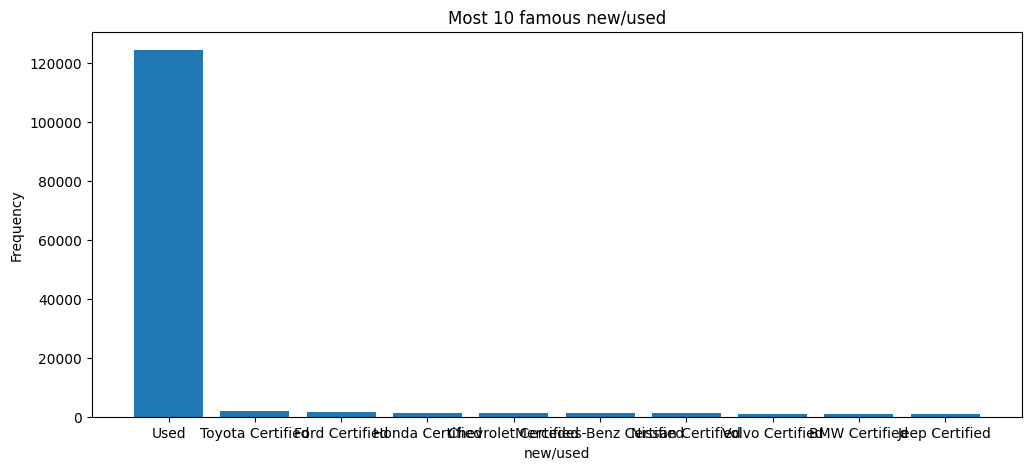

In [ ]:
top10newused = data['new/used'].value_counts()[:10]
plt.figure(figsize=(12,5))
plt.bar(top10newused.index,top10newused.values,width=0.8)
plt.title('Most 10 famous new/used')
plt.xlabel('new/used')
plt.ylabel('Frequency')
plt.show()
# Treat 'Used' as one type, 'Certified' as another type, fill nan with mode

In [ ]:
data['new/used'].fillna(data['new/used'].mode()[0],inplace=True)
data.loc[data['new/used']!='Used','new/used']='Certified'
data.loc[data['new/used']=='Used','new/used'] = '1'
data.loc[data['new/used']=='Certified','new/used'] = '0'
data['new/used'] = pd.to_numeric(data['new/used'],errors='coerce')
data['new/used'].unique()

array([1, 0])

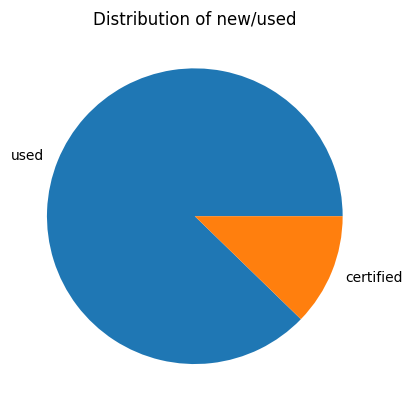

In [ ]:
plt.figure()
plt.pie(data['new/used'].value_counts().values,labels=['used','certified'])
plt.title('Distribution of new/used')
plt.show()

In [ ]:
mode_newused = data['new/used'].mode()[0]
mode_newused

1

2. Column name

  fill na with mode

In [ ]:
data['name'].unique().shape
# Use brand and brand year as two new features, drop name
# For example, '2022 Nissan Altima 2.5 S', brand=Nissan, brand year=2022

(20901,)

In [ ]:
data['brand year'] = data['name'].str.split(' ').str.get(0)
data['brand'] = data['name'].str.split(' ').str.get(1)
data.drop(columns=['name'],axis=1,inplace=True)
data['brand year'] = pd.to_numeric(data['brand year'])
data['brand year'].fillna(data['brand year'].mode()[0],inplace=True)
data['brand'].fillna(data['brand'].mode()[0],inplace=True)
data.head()

,new/used,milage,price,id,fuel consumption,drive mode,fuel type,accident history,clean title,one owner?,personal use,factory recall,brand year,brand
0,1,"25,279 mi.","$38,400",4f40a2dd-4080-4f32-84bf-c3bce4c0a7ca,19–27,Rear-wheel Drive,Gasoline,At least 1 accident or damage reported,NaN,No,No,NaN,2016.0,Jaguar
1,1,NaN,NaN,8b1ef161-c7b0-4ae4-b5a6-8441b951d684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,Ford
2,1,"28,800 mi.","$32,994",1b6dae71-3160-4c99-8477-edda938c424f,21–27,Four-wheel Drive,Gasoline,At least 1 accident or damage reported,NaN,Yes,Yes,At least 1 open recall reported,2022.0,Nissan
3,1,"35,230 mi.","$62,500",fa45d263-0171-4222-808f-c2fdf658ff74,13–19,Four-wheel Drive,Gasoline,None reported,NaN,No,Yes,NaN,2021.0,Jeep
4,1,"14,975 mi.","$44,995",3a98e7d4-71c0-4a88-87f1-576f4137d119,–,All-wheel Drive,Gasoline,None reported,NaN,Yes,Yes,NaN,2022.0,Cadillac


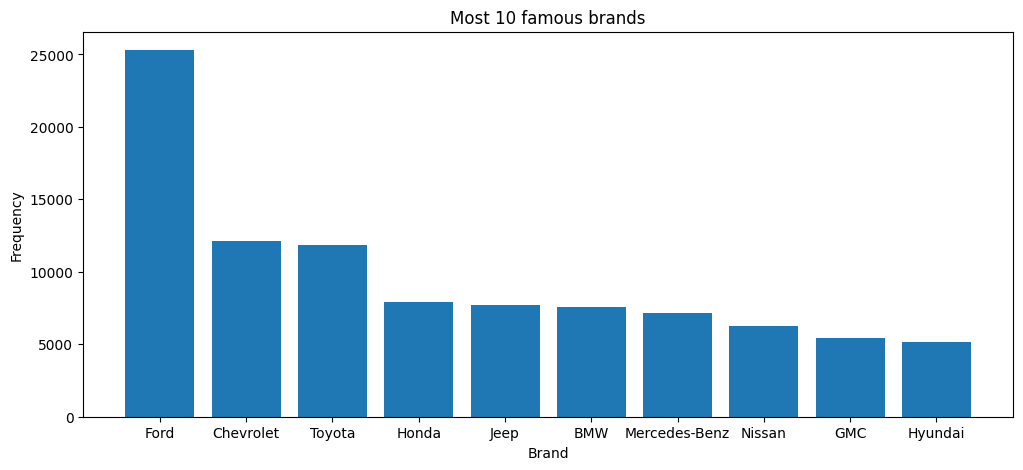

In [ ]:
top10brand = data['brand'].value_counts()[:10]
plt.figure(figsize=(12,5))
plt.bar(top10brand.index,top10brand.values,width=0.8)
plt.title('Most 10 famous brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data['brand'].value_counts()[:25].values.sum()/data['brand'].value_counts().values.sum(),data['brand'].value_counts().values.sum()

(0.9382833294570638, 154788)

In [ ]:
# among the most frequently occurring brands, the top 25 brands account for over 90% of the total quantity
# so treat other brands as other
data.loc[~data['brand'].isin(data['brand'].value_counts()[:25].index),'brand'] = 'other'
data['brand'].unique()

array(['other', 'Ford', 'Nissan', 'Jeep', 'Cadillac', 'Mercedes-Benz',
       'Chevrolet', 'BMW', 'Lexus', 'Volvo', 'Subaru', 'Dodge', 'Audi',
       'Porsche', 'INFINITI', 'Land', 'Toyota', 'Honda', 'Hyundai',
       'Mazda', 'Kia', 'Acura', 'GMC', 'Volkswagen', 'Lincoln', 'RAM'],
      dtype=object)

In [ ]:
brand_mode = data['brand'].mode()[0]
year_median = data['brand year'].median()
brand_mode,year_median

('Ford', 2020.0)

3. Column milage

  fill na with mean

In [ ]:
data['milage'] = data['milage'].str.replace(',','')
data['milage'] = data['milage'].str.replace(' ','')
data['milage'] = data['milage'].str.replace('mi.','')
data['milage'] = pd.to_numeric(data['milage'])
data['milage'].fillna(data['milage'].mean(),inplace=True)
data['milage']

<ipython-input-16-9b118846d467>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['milage'] = data['milage'].str.replace('mi.','')


0         25279.000000
1         50506.816881
2         28800.000000
3         35230.000000
4         14975.000000
              ...     
154783     4966.000000
154784      190.000000
154785    98361.000000
154786    48736.000000
154787      498.000000
Name: milage, Length: 154788, dtype: float64

<Figure size 640x480 with 0 Axes>

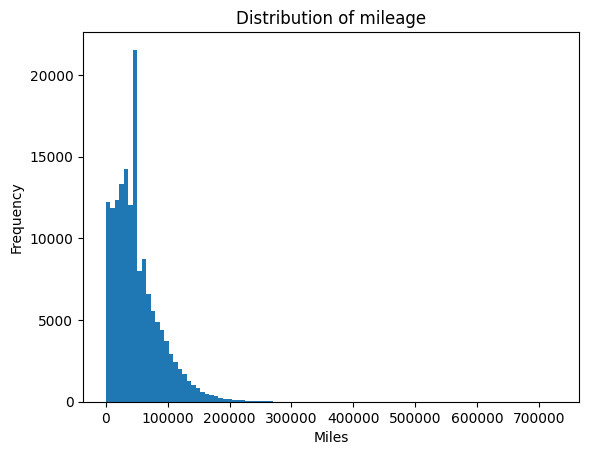

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
plt.hist(data['milage'].values,bins=100)
plt.title('Distribution of mileage')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.figure()

In [ ]:
milage_mean = data['milage'].mean()
milage_mean

50506.816880969476

4. Column price

  fill na with mean

In [ ]:
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace(',','')
data['price'] = pd.to_numeric(data['price'],errors='coerce')
data['price'].fillna(data['price'].mean(),inplace=True)
data['price']

<ipython-input-19-0e915b791ea8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$','')


0         38400.000000
1         34637.216663
2         32994.000000
3         62500.000000
4         44995.000000
              ...     
154783    43370.000000
154784    86998.000000
154785    14599.000000
154786    30775.000000
154787    38488.000000
Name: price, Length: 154788, dtype: float64

<Figure size 640x480 with 0 Axes>

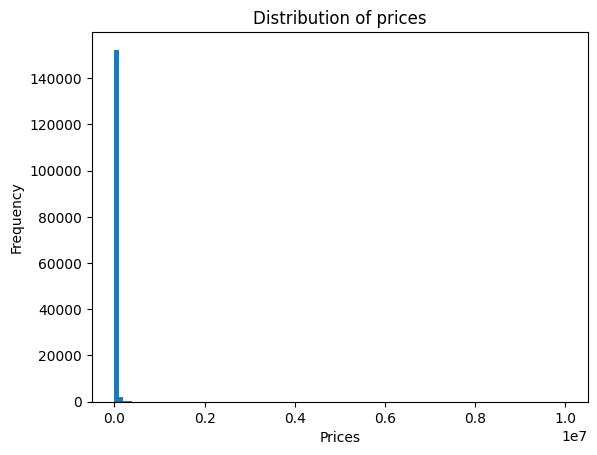

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
plt.hist(data['price'].values,bins=100)
plt.title('Distribution of prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.figure()

5. Column drive mode

  fill na with mode

In [ ]:
data['drive mode'].unique()
# '-' and 'Unknown' are missing values

array(['Rear-wheel Drive ', nan, 'Four-wheel Drive ', 'All-wheel Drive ',
       'Front-wheel Drive ', '– ', 'FWD ', 'Unknown ', 'AWD ', 'RWD ',
       '4WD ', 'Four Wheel Drive '], dtype=object)

In [ ]:
# some of them are the same mode with different name
data.loc[data['drive mode']=='Rear-wheel Drive ','drive mode'] = 'RWD '
data.loc[data['drive mode']=='All-wheel Drive ','drive mode'] = 'AWD '
data.loc[(data['drive mode']=='Four-wheel Drive ') | (data['drive mode']=='Four Wheel Drive '),'drive mode'] = '4WD '
data.loc[data['drive mode']=='Front-wheel Drive ','drive mode'] = 'FWD '
data['drive mode'].unique()

array(['RWD ', nan, '4WD ', 'AWD ', 'FWD ', '– ', 'Unknown '],
      dtype=object)

In [ ]:
# use one-hot encoder to encode 6 types
data.loc[data['drive mode']=='– ','drive mode'] = pd.NA
data.loc[data['drive mode']=='Unknown ','drive mode'] = pd.NA
data['drive mode'].fillna(data['drive mode'].mode()[0],inplace=True)

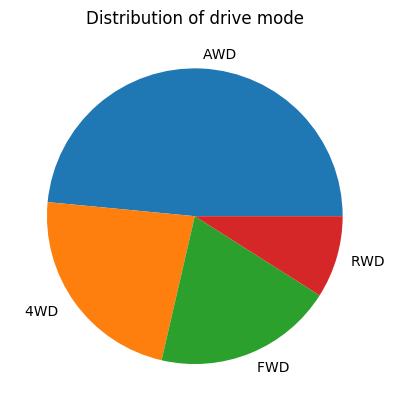

In [ ]:
plt.figure()
plt.pie(data['drive mode'].value_counts().values,labels=data['drive mode'].value_counts().index)
plt.title('Distribution of drive mode')
plt.show()

In [ ]:
drivemode_mode = data['drive mode'].mode()[0]
drivemode_mode

'AWD '

6. Column fuel consumption

  fill na with mean

In [ ]:
# Convert this interval into two new columns: fuel consumption min and fuel consumption max
data['fuel consumption min'] = data['fuel consumption'].str.split('–').str.get(0)
data['fuel consumption max'] = data['fuel consumption'].str.split('–').str.get(1)
data['fuel consumption min'] = pd.to_numeric(data['fuel consumption min'], errors='coerce')
data['fuel consumption max'] = pd.to_numeric(data['fuel consumption max'], errors='coerce')
data.drop(columns=['fuel consumption'],axis=1,inplace=True)
data['fuel consumption min'].fillna(data['fuel consumption min'].mean(),inplace=True)
data['fuel consumption max'].fillna(data['fuel consumption max'].mean(),inplace=True)
data.head()

,new/used,milage,price,id,drive mode,fuel type,accident history,clean title,one owner?,personal use,factory recall,brand year,brand,fuel consumption min,fuel consumption max
0,1,25279.000000,38400.000000,4f40a2dd-4080-4f32-84bf-c3bce4c0a7ca,RWD,Gasoline,At least 1 accident or damage reported,NaN,No,No,NaN,2016.0,other,19.000000,27.000000
1,1,50506.816881,34637.216663,8b1ef161-c7b0-4ae4-b5a6-8441b951d684,AWD,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,Ford,20.846311,27.211664
2,1,28800.000000,32994.000000,1b6dae71-3160-4c99-8477-edda938c424f,4WD,Gasoline,At least 1 accident or damage reported,NaN,Yes,Yes,At least 1 open recall reported,2022.0,Nissan,21.000000,27.000000
3,1,35230.000000,62500.000000,fa45d263-0171-4222-808f-c2fdf658ff74,4WD,Gasoline,None reported,NaN,No,Yes,NaN,2021.0,Jeep,13.000000,19.000000
4,1,14975.000000,44995.000000,3a98e7d4-71c0-4a88-87f1-576f4137d119,AWD,Gasoline,None reported,NaN,Yes,Yes,NaN,2022.0,Cadillac,20.846311,27.211664


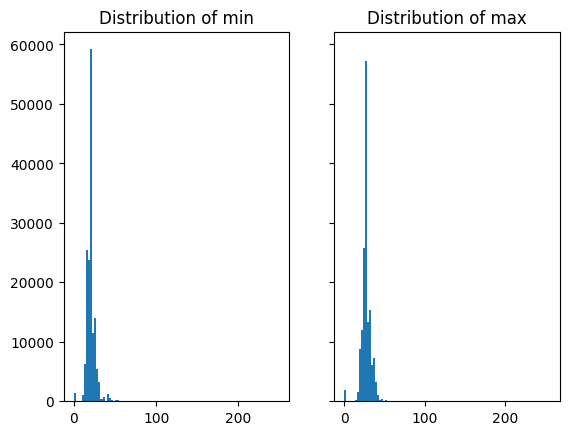

In [ ]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(data['fuel consumption min'],bins=100)
axes[0].set_title('Distribution of min')
axes[1].hist(data['fuel consumption max'],bins=100)
axes[1].set_title('Distribution of max')
plt.show()

In [ ]:
fuelconsumptionmin_mean = data['fuel consumption min'].mean()
fuelconsumptionmax_mean = data['fuel consumption max'].mean()
fuelconsumptionmin_mean,fuelconsumptionmax_mean

(20.84631084473961, 27.211664439591956)

7. Column fuel tye

  fill na with mode

In [ ]:
data['fuel type'].unique()
# '-' is missing value, use one-hot encoder to encode other 6 types

array(['Gasoline ', nan, 'Hybrid ', '– ', 'E85 Flex Fuel ', 'Diesel ',
       'Gasoline/Mild Electric Hybrid ',
       'BEV (battery electric vehicle) ', 'Other ', 'Regular ', 'B ',
       'Flexible Fuel ', 'All-Electric ', 'Plug-In Hybrid ',
       'Natural Gas ', 'Compressed Natural Gas ',
       'MHEV (mild hybrid electric vehicle) ', 'Bio Diesel ',
       'Biodiesel ', 'mild ', 'PHEV (plug-in hybrid electric vehicle) ',
       'Gasoline Fuel ', 'Gaseous ', 'Regular Unleaded '], dtype=object)

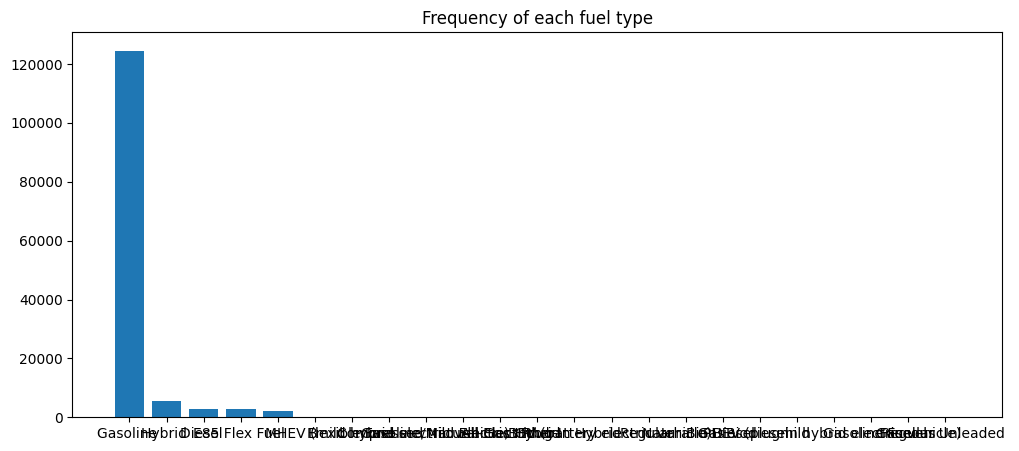

Index(['Gasoline ', 'Hybrid ', 'Diesel ', 'E85 Flex Fuel ', '– '], dtype='object')

In [ ]:
fuel_type = data['fuel type'].value_counts()
plt.figure(figsize=(12,5))
plt.bar(fuel_type.index,fuel_type.values,width=0.8)
plt.title('Frequency of each fuel type')
plt.show()
fuel_type[:5].index

In [ ]:
# So we can treat 'Gasoline ', 'Hybrid ', 'Diesel ', 'E85 Flex Fuel ' as 4 major types, treat all others as 'other'
data.loc[data['fuel type']=='– ','fuel type'] = pd.NA
data['fuel type'].fillna(data['fuel type'].mode()[0],inplace=True)
data.loc[~data['fuel type'].isin(['Gasoline ', 'Hybrid ', 'Diesel ', 'E85 Flex Fuel ', '– ']),'fuel type'] = 'other'
data['fuel type'].unique()

array(['Gasoline ', 'Hybrid ', 'E85 Flex Fuel ', 'Diesel ', 'other'],
      dtype=object)

In [ ]:
fueltype_mode = data['fuel type'].mode()[0]
fueltype_mode

'Gasoline '

8. Column accident history

  fill na with mode

In [ ]:
data['accident history'].unique()
# boolean value, treat other values as missing value

array(['At least 1 accident or damage reported', nan, 'None reported',
       'Less than 5 years/less than 80,000 miles',
       '7 years/less than 85,000 miles', '6 years/less than 80,000 miles',
       '5 model years or newer/less than 75,000 miles',
       'More than 12 months or 12,000 miles from their original in-service date, with 80,000 miles or fewer at time of vehicle delivery.',
       'No limits', '6 years or newer/less than 80,000 miles',
       'Gold Certified: Ford models up to 6 years old with less than 80,000 miles',
       '6 years old or less/less than 75,000 miles',
       '10 years old or newer from their original in-service date at the time of sale.',
       'Fords and many non-Ford vehicles up to 10 years old with less than 150,000 miles',
       '5 years/less than 70,000 miles', '5 years/80,000 miles',
       '6 years old and newer from their original in-service date, with 80,000 miles or fewer at time of vehicle delivery.',
       'MY 2016-MY 2017 vehicles/75,00

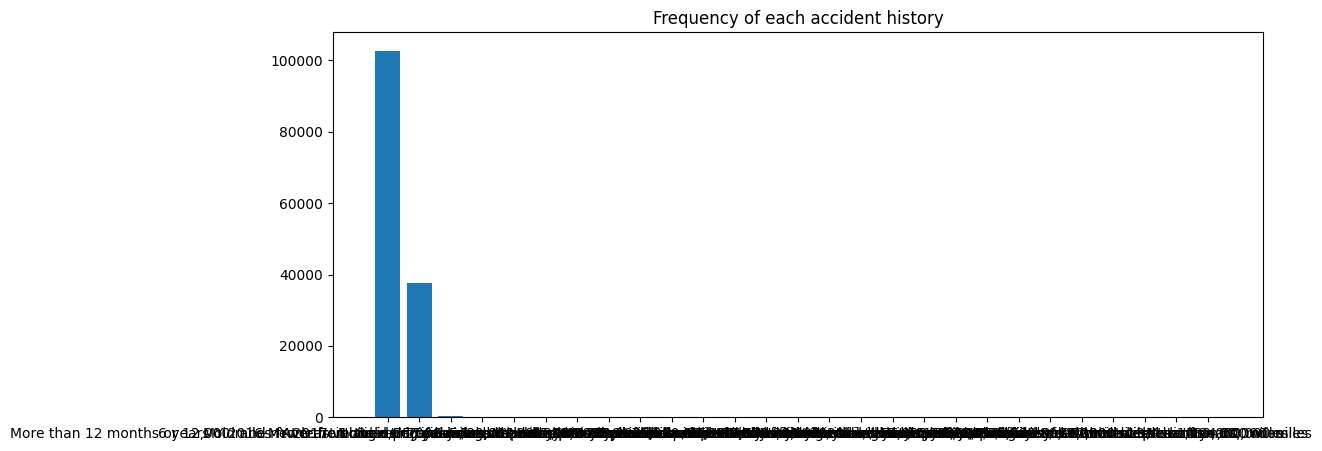

Index(['None reported', 'At least 1 accident or damage reported',
       'More than 12 months or 12,000 miles from their original in-service date, with 80,000 miles or fewer at time of vehicle delivery.'],
      dtype='object')

In [ ]:
accident_history = data['accident history'].value_counts()
plt.figure(figsize=(12,5))
plt.bar(accident_history.index,accident_history.values,width=0.8)
plt.title('Frequency of each accident history')
plt.show()
accident_history[:3].index

In [ ]:
# # So we can treat 'None reported', 'At least 1 accident or damage reported' as 2 major types, treat all others as 'other'
data['accident history'].fillna(data['accident history'].mode()[0],inplace=True)
data.loc[~data['accident history'].isin(['None reported', 'At least 1 accident or damage reported']),'accident history'] = 'other'
data['accident history'].unique()

array(['At least 1 accident or damage reported', 'None reported', 'other'],
      dtype=object)

In [ ]:
accidenthistory_mode = data['accident history'].mode()[0]
accidenthistory_mode

'None reported'

9. Column one owner?

  fill na with mode

In [ ]:
data['one owner?'].unique()
# fillin nan with mode

array(['No', nan, 'Yes', '7 years/100,000 miles',
       '84 months/100,000 miles (includes LEAF electric vehicle system and powertrain)',
       'Remainder of new-car 4-year/unlimited-mileage warranty plus 12 or 24 months.',
       '10 years/100,000 miles',
       '7-Year/100,000-Mile (whichever comes first) Powertrain Limited Warranty Blue Certified: Available Disclaimer: See your dealer for warranty coverage details.',
       '1 year/unlimited miles', '100 days/5,000 miles', 'Available',
       '7 years/100,000', '–', '4 years/ 50,000 miles',
       '7-year/100,00-Mile (whichever comes first)',
       '6 years/70,000 miles', '6 years/100,000 miles (2012-2017 models)',
       '6 years/100,000 miles', '6 months/7,500 miles',
       '2 years/unlimited miles after new-car limited warranty expires or from the date of sale if the new vehicle limited warranty has expired'],
      dtype=object)

In [ ]:
data['one owner?'].fillna(data['one owner?'].mode()[0],inplace=True)
data.loc[~data['one owner?'].isin(['Yes', 'No']),'one owner?'] = 'other'
data['one owner?'].unique()

array(['No', 'Yes', 'other'], dtype=object)

In [ ]:
oneowner_mode = data['one owner?'].mode()[0]
oneowner_mode

'Yes'

10. Column personal use

  fill na with mode

In [ ]:
data['personal use'].unique()
# boolean value, treat other values as missing value

array(['No', nan, 'Yes', '\n\n          170- plus point inspection\n\n',
       '\n\n          160- or 174-point inspections\n\n',
       '167-point inspection', '\n\n          125-point inspection\n\n',
       '\n\n          182-point inspection\n\n', '\n\n          Yes\n\n',
       '\n\n          165-point inspection\n\n',
       '\n\n          Certified 172-point inspection \n\n',
       '164-point inspection', '\n\n          112 point inspection\n\n',
       '\n\n          139-point inspection\n\n', '152-point inspection',
       '\n\n          100-plus point inspection\n\n',
       '\n\n          Multipoint inspection\n\n',
       '\n\n          Certified 127-point inspection\n\n',
       '\n\n          200-point inspection\n\n',
       '\n\n          172-point inspection\n\n', '172-point inspection',
       '101-point inspection', '\n\n          196-point inspection\n\n',
       '\n\n          111-point inspection\n\n'], dtype=object)

In [ ]:
data['personal use'].fillna(data['personal use'].mode()[0],inplace=True)
data.loc[~data['personal use'].isin(['Yes', 'No']),'personal use'] = 'other'
data['personal use'].unique()

array(['No', 'Yes', 'other'], dtype=object)

In [ ]:
personaluse_mode = data['personal use'].mode()[0]
personaluse_mode

'Yes'

11. Column factory recall and clean title

  Too many nulls, drop these 2 columns

In [ ]:
data.drop(columns=['factory recall','clean title','id'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154788 entries, 0 to 154787
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   new/used              154788 non-null  int64  
 1   milage                154788 non-null  float64
 2   price                 154788 non-null  float64
 3   drive mode            154788 non-null  object 
 4   fuel type             154788 non-null  object 
 5   accident history      154788 non-null  object 
 6   one owner?            154788 non-null  object 
 7   personal use          154788 non-null  object 
 8   brand year            154788 non-null  float64
 9   brand                 154788 non-null  object 
 10  fuel consumption min  154788 non-null  float64
 11  fuel consumption max  154788 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 14.2+ MB


In [ ]:
data.to_csv(r'/content/drive/MyDrive/602/DataForFinal/data_afterFillna.csv')

# Normalization

In [ ]:
data[['milage','brand year','fuel consumption min','fuel consumption max']] = StandardScaler().fit_transform(data[['milage','brand year','fuel consumption min','fuel consumption max']])
data.head()

,new/used,milage,price,drive mode,fuel type,accident history,one owner?,personal use,brand year,brand,fuel consumption min,fuel consumption max
0,1,-6.649190e-01,38400.000000,RWD,Gasoline,At least 1 accident or damage reported,No,No,-0.671587,other,-3.208156e-01,-0.035195
1,1,3.835387e-16,34637.216663,AWD,Gasoline,None reported,Yes,Yes,0.500749,Ford,6.173207e-16,0.000000
2,1,-5.721175e-01,32994.000000,4WD,Gasoline,At least 1 accident or damage reported,Yes,Yes,0.735217,Nissan,2.670508e-02,-0.035195
3,1,-4.026447e-01,62500.000000,4WD,Gasoline,None reported,No,Yes,0.500749,Jeep,-1.363378e+00,-1.365423
4,1,-9.364972e-01,44995.000000,AWD,Gasoline,None reported,Yes,Yes,0.735217,Cadillac,6.173207e-16,0.000000


In [ ]:
data.to_csv(r'/content/drive/MyDrive/602/DataForFinal/data_afterNorm.csv')

# Encode
Option 1: use one-hot encoder to encode drive mode, fuel type, accident history, one owner?, personal use, brand

In [ ]:
enc = OneHotEncoder()
drive_mode = enc.fit_transform(data[['drive mode']]).toarray()
drive_mode = pd.DataFrame(drive_mode,columns=enc.get_feature_names_out())
drive_mode

,drive mode_4WD,drive mode_AWD,drive mode_FWD,drive mode_RWD
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
154783,0.0,0.0,1.0,0.0
154784,1.0,0.0,0.0,0.0
154785,0.0,0.0,1.0,0.0
154786,0.0,1.0,0.0,0.0


In [ ]:
enc = OneHotEncoder()
fuel_type = enc.fit_transform(data[['fuel type']]).toarray()
fuel_type = pd.DataFrame(fuel_type,columns=enc.get_feature_names_out())
fuel_type

,fuel type_Diesel,fuel type_E85 Flex Fuel,fuel type_Gasoline,fuel type_Hybrid,fuel type_other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
154783,0.0,0.0,1.0,0.0,0.0
154784,0.0,0.0,1.0,0.0,0.0
154785,0.0,0.0,1.0,0.0,0.0
154786,0.0,0.0,1.0,0.0,0.0


In [ ]:
enc = OneHotEncoder()
accident_history = enc.fit_transform(data[['accident history']]).toarray()
accident_history = pd.DataFrame(accident_history,columns=enc.get_feature_names_out())
accident_history

,accident history_At least 1 accident or damage reported,accident history_None reported,accident history_other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
154783,0.0,1.0,0.0
154784,0.0,1.0,0.0
154785,0.0,1.0,0.0
154786,0.0,1.0,0.0


In [ ]:
enc = OneHotEncoder()
one_owner = enc.fit_transform(data[['one owner?']]).toarray()
one_owner = pd.DataFrame(one_owner,columns=enc.get_feature_names_out())
one_owner

,one owner?_No,one owner?_Yes,one owner?_other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
154783,1.0,0.0,0.0
154784,0.0,1.0,0.0
154785,1.0,0.0,0.0
154786,1.0,0.0,0.0


In [ ]:
enc = OneHotEncoder()
personal_use = enc.fit_transform(data[['personal use']]).toarray()
personal_use = pd.DataFrame(personal_use,columns=enc.get_feature_names_out())
personal_use

,personal use_No,personal use_Yes,personal use_other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
154783,1.0,0.0,0.0
154784,0.0,1.0,0.0
154785,0.0,1.0,0.0
154786,0.0,1.0,0.0


In [ ]:
enc = OneHotEncoder()
brand = enc.fit_transform(data[['brand']]).toarray()
brand = pd.DataFrame(brand,columns=enc.get_feature_names_out())
brand

,brand_Acura,brand_Audi,brand_BMW,brand_Cadillac,brand_Chevrolet,brand_Dodge,brand_Ford,brand_GMC,brand_Honda,brand_Hyundai,...,brand_Mazda,brand_Mercedes-Benz,brand_Nissan,brand_Porsche,brand_RAM,brand_Subaru,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_formodel = pd.concat([data,drive_mode,fuel_type,accident_history,one_owner,personal_use,brand],axis=1)
data_formodel.drop(columns=['drive mode','fuel type','brand','accident history','one owner?','personal use'],axis=1,inplace=True)
data_formodel

,new/used,milage,price,brand year,fuel consumption min,fuel consumption max,drive mode_4WD,drive mode_AWD,drive mode_FWD,drive mode_RWD,...,brand_Mazda,brand_Mercedes-Benz,brand_Nissan,brand_Porsche,brand_RAM,brand_Subaru,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_other
0,1,-6.649190e-01,38400.000000,-0.671587,-3.208156e-01,-0.035195,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.835387e-16,34637.216663,0.500749,6.173207e-16,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,-5.721175e-01,32994.000000,0.735217,2.670508e-02,-0.035195,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-4.026447e-01,62500.000000,0.500749,-1.363378e+00,-1.365423,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,-9.364972e-01,44995.000000,0.735217,6.173207e-16,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154783,0,-1.200300e+00,43370.000000,0.969684,2.004654e-01,-0.035195,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154784,1,-1.326179e+00,86998.000000,0.969684,-4.945759e-01,-0.700309,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154785,1,1.261273e+00,14599.000000,-0.906055,-4.945759e-01,-0.367752,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154786,1,-4.667268e-02,30775.000000,-0.671587,2.004654e-01,0.131083,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Option 2: use ordinal encoder to encode drive mode, fuel type, brand

In [ ]:
# enc = OrdinalEncoder()
# drive_mode = enc.fit_transform(data[['drive mode']])
# fuel_type = enc.fit_transform(data[['fuel type']])
# brand = enc.fit_transform(data[['brand']])
# drive_mode = pd.DataFrame(drive_mode,columns=['drive mode'])
# fuel_type = pd.DataFrame(fuel_type,columns=['fuel type'])
# brand = pd.DataFrame(brand,columns=['brand'])
# data_formodel = data.copy()
# data_formodel.drop(columns=['drive mode','fuel type','brand'],axis=1,inplace=True)
# data_formodel = pd.concat([data_formodel,drive_mode,fuel_type,brand],axis=1)
# data_formodel[['fuel type','brand','drive mode']] = StandardScaler().fit_transform(data_formodel[['fuel type','brand','drive mode']])
# data_formodel.head()

# Output dataset

In [ ]:
data_formodel.to_csv(r'/content/drive/MyDrive/602/DataForFinal/data_formodel.csv')